### FUNNEL CONVERISON ANALYSIS

Funnel conversion analysis is a method to track and measure how users move through each stage of the sales or engagement funnel. It helps identify where most users drop off and which stages need improvement.

### Key Steps in Funnel Conversion:
1. **Stage Definition**  
   Define the stages clearly, such as *View → Click → Add to Cart → Purchase*.

2. **Data Aggregation**  
   Summarize user activities at each stage to get the total number of users engaging.

3. **Conversion Ratio Calculation**  
   Calculate the percentage of users moving from one stage to the next.  
   - Formula:  
     \[
     \text{Conversion Rate} = \frac{\text{Users at Current Stage}}{\text{Users at Previous Stage}} \times 100
     \]

4. **Drop-off Identification**  
   Determine the percentage of users lost between stages to highlight where most users exit the funnel.

5. **Visualization**  
   Use funnel charts or bar plots to display user flow, conversion rates, and drop-offs for clearer insights.

### Why It Matters
- Pinpoints the **critical bottlenecks** in the user journey.  
- Provides insights for **optimization strategies** such as redesigning UI, adjusting marketing, or improving pricing.  
- Helps evaluate the **efficiency of campaigns** and product performance.


**Importing and Understanding Data**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_product = pd.read_csv('tbl_product.csv')
df_funnel = pd.read_csv('funnel.csv')

In [6]:
print(f"The head of product table : \n{df_product.head()}")
print(f"The head of funnel table : \n{df_funnel.head()}")

The head of product table : 
     product_id        product_name product_category  product_cost  \
0  DQProduk-001   Buku Agenda DQLab      Merchandise        149850   
1  DQProduk-002   Termos Logo DQLab      Merchandise        149850   
2  DQProduk-003  Sticky Notes DQLab       Alat Tulis         29850   
3  DQProduk-004   Notebook A5 DQLab     Buku Catatan        149850   
4  DQProduk-005  Dompet Kartu DQLab      Merchandise        119850   

   product_price  
0         239850  
1         194850  
2          59850  
3         194850  
4         149850  
The head of funnel table : 
      date    product_id        product_name product_category  purchase  \
0  1012024  DQProduk-001   Buku Agenda DQLab      Merchandise        87   
1  1012024  DQProduk-002   Termos Logo DQLab      Merchandise        70   
2  1012024  DQProduk-003  Sticky Notes DQLab       Alat Tulis         9   
3  1012024  DQProduk-004   Notebook A5 DQLab     Buku Catatan        17   
4  1012024  DQProduk-005  Dompet 

In [7]:
print(f"The shape of product table : \n{df_product.shape}")
print(f"The shape of funnel table : \n{df_funnel.shape}")

The shape of product table : 
(37, 5)
The shape of funnel table : 
(16727, 8)


In [8]:
print(f"The info of product table : \n{df_product.info()}")
print(f"The info of funnel table : \n{df_funnel.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        37 non-null     object
 1   product_name      37 non-null     object
 2   product_category  37 non-null     object
 3   product_cost      37 non-null     int64 
 4   product_price     37 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.6+ KB
The info of product table : 
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16727 entries, 0 to 16726
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              16727 non-null  int64 
 1   product_id        16727 non-null  object
 2   product_name      16727 non-null  object
 3   product_category  16727 non-null  object
 4   purchase          16727 non-null  int64 
 5   add_to_cart       16727 non-null  int64 
 6   click      

**Data Preparation**

In [9]:
df_merged = pd.merge(
    df_product[['product_id', 'product_category']],
    df_funnel,
    on='product_id',
    how='left'
)


In [10]:
df_merged.rename(columns={'product_category_x': 'product_category'}, inplace=True)


In [11]:
#Choose the usable column
new_col = [col for col in[
    'date', 'product_id', 'product_name', 'product_category', 'purchase',
    'add_to_cart', 'click', 'view'
] if col in df_merged.columns]

In [12]:
df_merged = df_merged[new_col]

In [13]:
df_merged.head()

,date,product_id,product_name,product_category,purchase,add_to_cart,click,view
0,1012024,DQProduk-001,Buku Agenda DQLab,Merchandise,87,979,3434,6631
1,2012024,DQProduk-001,Buku Agenda DQLab,Merchandise,193,1881,6648,7044
2,3012024,DQProduk-001,Buku Agenda DQLab,Merchandise,22,233,1229,2246
3,4012024,DQProduk-001,Buku Agenda DQLab,Merchandise,58,607,2591,3871
4,5012024,DQProduk-001,Buku Agenda DQLab,Merchandise,160,1777,6372,11430


**Feature Engineering**

In [14]:
#Calculate total users/customers in every funnel stages
tot_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()

print(f"Total users in every funnel step : \n{tot_funnel}")

Total users in every funnel step : 
view           80125032
click          63423975
add_to_cart    11652997
purchase        1166672
dtype: int64


In [15]:
#Calculate the conversion ratio between funnel stages
con_rate = (tot_funnel/tot_funnel.shift(1)) * 100
con_rate = con_rate[1:]

print(f"Conversion rate in every stages : \n{con_rate}")

Conversion rate in every stages : 
click          79.156255
add_to_cart    18.373174
purchase       10.011776
dtype: float64


In [16]:
#Calculate the absolute dropoff
dropoff = tot_funnel.shift(1) - tot_funnel
dropoff = dropoff[1:]

print(f"Drop off in every stages : \n{dropoff}")

Drop off in every stages : 
click          16701057.0
add_to_cart    51770978.0
purchase       10486325.0
dtype: float64


In [17]:
#Calculate the precentage of dropoff
pct_dropoff = dropoff/tot_funnel.shift(1)[1:] *100

print(f"Percentage of drop off in every stages : \n{pct_dropoff.round(2)}")

Percentage of drop off in every stages : 
click          20.84
add_to_cart    81.63
purchase       89.99
dtype: float64


In [18]:
#Calculate avsolute drop off for each stages
df_merged = df_merged.groupby('product_category')[['view', 'click', 'add_to_cart',
                                                   'purchase']].sum().reset_index()

df_merged['drop_view_click'] = df_merged['view'] - df_merged['click']
df_merged['drop_clik_cart'] = df_merged['click'] - df_merged['add_to_cart']
df_merged['drop_cart_purchase'] = df_merged['add_to_cart'] - df_merged['purchase']

#Calculate total drop off
df_merged['total_dropoff'] = df_merged['drop_view_click'] + df_merged['drop_clik_cart'] + df_merged['drop_cart_purchase']


In [19]:
#Top 5 products with highest drop off
top_dropoff = df_merged[['product_category', 'total_dropoff']].sort_values(by='total_dropoff', ascending=False)

print(f"Top 5 products with highest drop off : \n{top_dropoff.head()}")

Top 5 products with highest drop off : 
  product_category  total_dropoff
2       Elektronik       21252386
4      Merchandise       18195452
0       Alat Tulis       16607185
3   Kertas & Cetak       13041066
6       Pengemasan        3922981


In [20]:
#Calculate the conversion rate from view into purchase for each category
con_by_category = df_merged.groupby('product_category')[['view', 'purchase']].sum().reset_index()
con_by_category['conversion_rate'] = round((con_by_category['purchase'] / con_by_category['view']) *100, 2)


In [21]:
#Order by highest
con_by_category = con_by_category.sort_values(by='conversion_rate', ascending=False)

In [22]:
print(f"Conversion rate per product category : \n{con_by_category}")

Conversion rate per product category : 
    product_category      view  purchase  conversion_rate
6         Pengemasan   3983229     60248             1.51
0         Alat Tulis  16857424    250239             1.48
4        Merchandise  18464136    268684             1.46
3     Kertas & Cetak  13234056    192990             1.46
2         Elektronik  21565108    312722             1.45
7  Perlengkapan Meja   2704624     37943             1.40
5         Organisasi   2874258     40017             1.39
1       Buku Catatan    442197      3829             0.87


**Visualization**

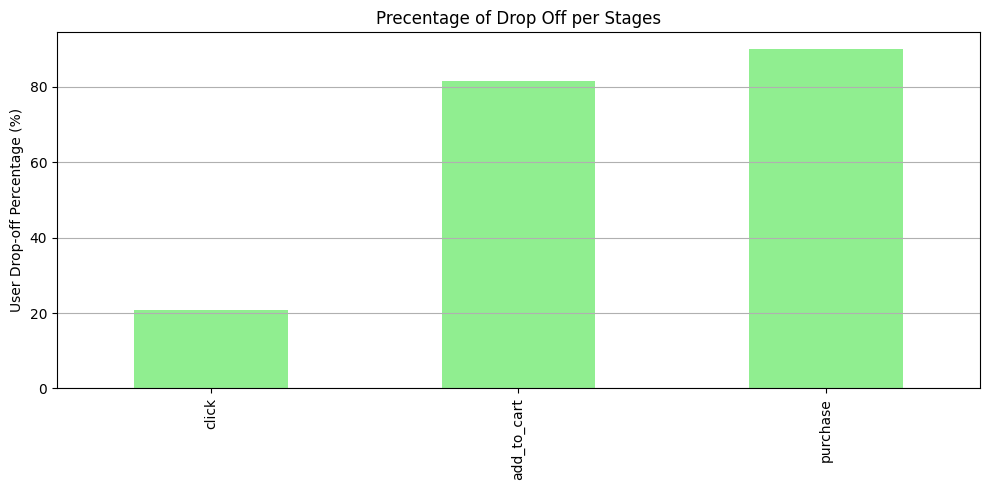

In [23]:
#Plot precentage of dropoff
plt.figure(figsize=(10,5))
pct_dropoff.plot(kind='bar', color='lightgreen')
plt.title('Precentage of Drop Off per Stages')
plt.ylabel('User Drop-off Percentage (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
#Calculate total user in every funnel
total_funnel = df_merged[['view', 'click', 'add_to_cart', 'purchase']].sum()

stages = total_funnel.index.tolist()
values = total_funnel.values.tolist()

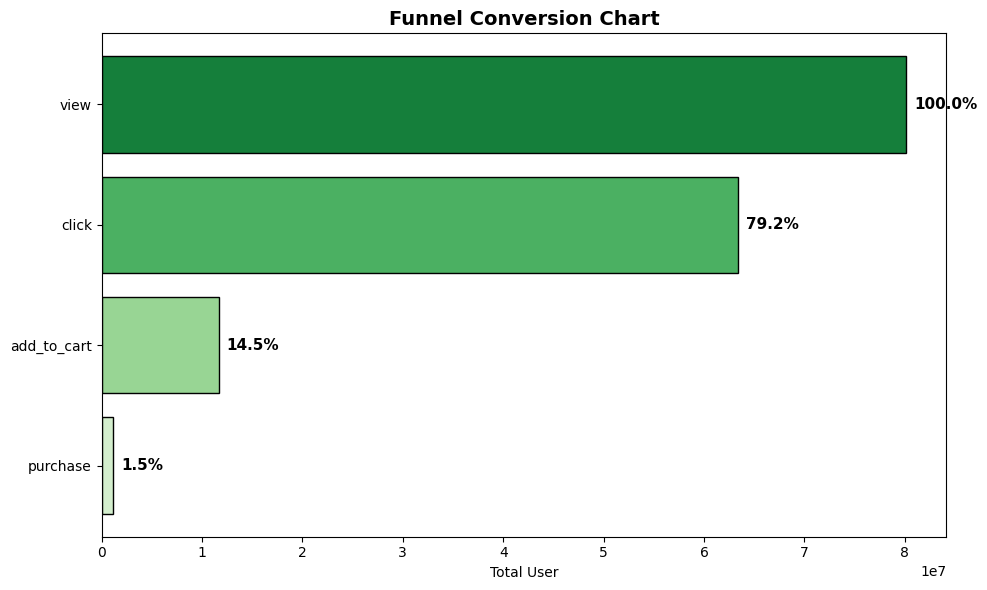

In [25]:
colors = sns.color_palette('Greens', len(stages))[::-1]

plt.figure(figsize=(10,6))
for i, (stage, value) in enumerate(zip(stages, values)):
    plt.barh(stage, value, color=colors[i], edgecolor='black')

    percent = f"{value/values[0]*100:.1f}%"

    plt.text(value + max(values)*0.01, i, percent, va='center', ha='left',
             color='black', fontsize= 11, fontweight='bold')

plt.gca().invert_yaxis()
plt.title('Funnel Conversion Chart', fontsize=14, fontweight='bold')
plt.xlabel('Total User')
plt.tight_layout()
plt.show()

## Conclusion & Recommendation

### Conclusion
The funnel conversion analysis reveals that from a total of **76,594,780 views (100%)**,  
- **79% (60,133,580)** successfully converted into clicks,  
- but the conversion rate dropped significantly at the **add_to_cart stage** with only **15% (11,149,410)**,  
- and eventually, only **1% (1,115,934)** of total views resulted in purchases.  

This highlights a **critical drop-off between the click and add_to_cart stages**, which indicates a major bottleneck in the funnel.

### Recommendation
- **Investigate the Add-to-Cart Experience**: Check if there are issues related to UX, slow loading, or unnecessary steps that discourage users from adding products to the cart.  
- **Optimize Product & Pricing Strategy**: Ensure products displayed after clicks align with user intent and offer competitive pricing.  
- **Targeted Promotions or Discounts**: Provide incentives (e.g., limited-time discounts, free shipping) to encourage users to proceed beyond the add_to_cart stage.  
- **Personalized Retargeting**: Use remarketing strategies for users who clicked but did not add items to their cart, such as personalized emails or ads.  
